# Computing Vision data analysis

## Part 1: Preparing data

In [87]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns
sns.set()

In [109]:
#read data
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ANSI')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
conn = sqlite3.connect('zippedData/im.db.zip')

### Movie gross dataset

In [110]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [111]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [112]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [113]:
# change foreign_gross column from object type to float
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',','')
movie_gross['foreign_gross'] = movie_gross["foreign_gross"].astype("float64")




<AxesSubplot:xlabel='domestic_gross', ylabel='Density'>

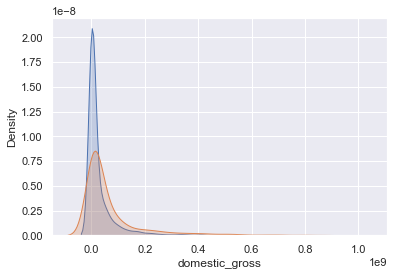

In [114]:
#kernel density plot
sns.kdeplot( movie_gross['domestic_gross'],shade= True)
sns.kdeplot( movie_gross['foreign_gross'],shade= True)

In [115]:
##fill NA with median in foreign_gross and domestic_gross columns 
movie_gross['foreign_gross'] = movie_gross["foreign_gross"].fillna(movie_gross['foreign_gross'].median())
movie_gross['domestic_gross'] = movie_gross["domestic_gross"].fillna(movie_gross['domestic_gross'].median())
#drop 5 NA in studio column
movie_gross= movie_gross.dropna()

In [116]:
movie_gross['foreign_gross'].mean()

52516148.51463631

In [117]:
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

<AxesSubplot:xlabel='domestic_gross', ylabel='Density'>

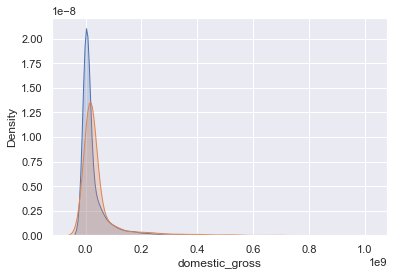

In [118]:
#kernel density plot after fill N/A with median
sns.kdeplot( movie_gross['domestic_gross'],shade= True)
sns.kdeplot( movie_gross['foreign_gross'],shade= True)


### Movie_info dataset

In [119]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [120]:
#change theater_date and dvd_date object type to date type
movie_info['theater_date']= pd.to_datetime(movie_info['theater_date'])
movie_info['dvd_date'] = pd.to_datetime(movie_info['dvd_date'])
#change runtime   to float data type
movie_info['runtime'] = movie_info['runtime'].str.replace('minutes','')
movie_info['runtime']  = movie_info['runtime'].astype("float64")
#movie_info['box_office']= movie_info['box_office'].astype("float64")
### create copy of movie data set that remove 3 columns currency, box office and studio
movie_info_1= movie_info.drop(labels=['currency', 'box_office', 'studio'], axis=1)


In [121]:
#drop na
movie_info_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   runtime       1530 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 109.8+ KB


In [123]:
movie_info_1.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            881 non-null    int64         
 1   synopsis      881 non-null    object        
 2   rating        881 non-null    object        
 3   genre         881 non-null    object        
 4   director      881 non-null    object        
 5   writer        881 non-null    object        
 6   theater_date  881 non-null    datetime64[ns]
 7   dvd_date      881 non-null    datetime64[ns]
 8   runtime       881 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 68.8+ KB


<AxesSubplot:xlabel='theater_date', ylabel='Count'>

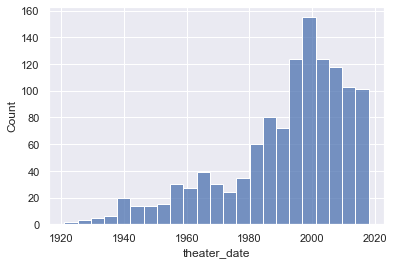

In [124]:
#histogram of movie year 
sns.histplot(movie_info_1['theater_date'].dt.year)

In [ ]:
movie_info

### Review dataset

In [26]:
reviews


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [ ]:
# rt_info.rename(columns={'currency':'currency_dollars'}, inplace=True)
# rt_info['currency_dollars'].fillna(False, inplace=True)
# rt_info.loc[rt_info['currency_dollars'] == '$', 'currency_dollars'] = True

In [10]:
reviews.rating.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [27]:
reviews.groupby("id").count()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,162,113,163,160,163,163,163
5,6,20,23,21,23,23,23
6,49,41,57,52,57,57,57
8,57,40,75,69,75,75,75
10,107,61,108,104,108,107,108
...,...,...,...,...,...,...,...
1996,135,115,143,139,143,142,143
1997,19,23,28,24,28,28,28
1998,2,2,2,2,2,2,2


In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [30]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
